20BPS1099
JALADI DEEPIKA
AI ASSIGNMENT 2

Task 1: Read the dataset and do data pre-processing


In [2]:
# importing the required lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the csv file

df = pd.read_csv('/content/drug200.csv')

# Visualizing the 1st 5 observations

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
# Check the null values

df.isnull().sum()
     

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# We are not having any null values so we can skip the handling null value step.

In [7]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [11]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [12]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [13]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [14]:
#check for outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

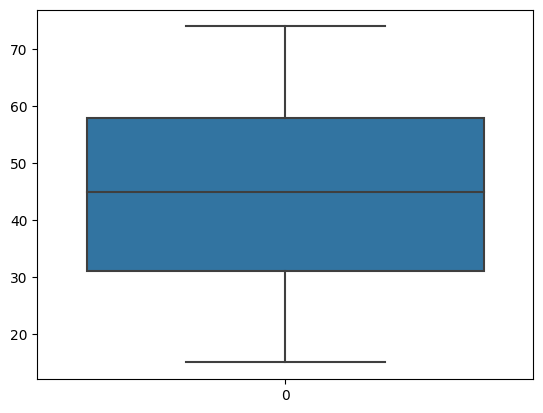

In [15]:
sns.boxplot(df.Age)

<Axes: >

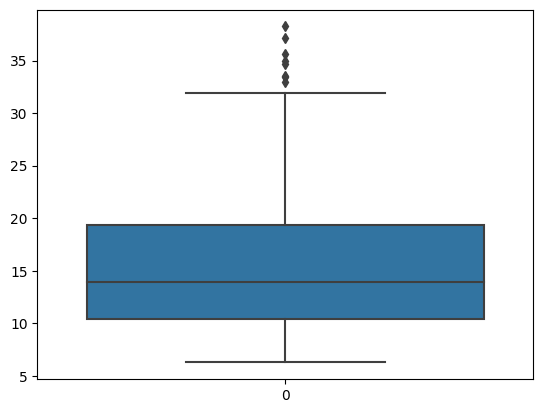

In [16]:
sns.boxplot(df.Na_to_K)

In [ ]:
#here we observe that the column Na_to_K has outliers
#so, we will replace these outliers with the median value

In [18]:
q1=df.Na_to_K.quantile(.25)
q3=df.Na_to_K.quantile(.75)
q1,q3

(10.4455, 19.38)

In [19]:
iqr=q3-q1
iqr

8.9345

In [20]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [21]:
df.median()

<ipython-input-21-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

<Axes: >

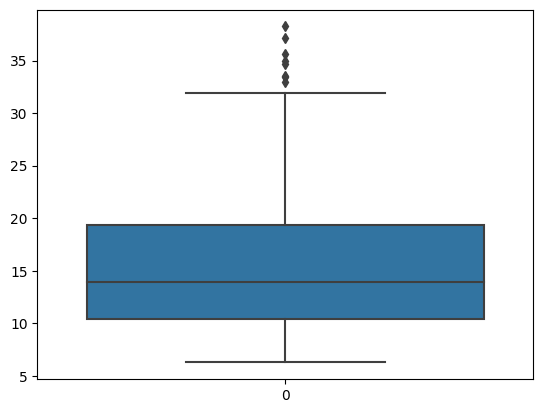

In [22]:
sns.boxplot(df.Na_to_K)

In [ ]:
#As we can observe,most of outliers are replaced

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder() # initialize the lib
df['Sex']=le1.fit_transform(df['Sex'])

In [24]:
le2 = LabelEncoder() # initialize the lib
df['BP']=le2.fit_transform(df['BP'])

In [25]:
le3 = LabelEncoder() # initialize the lib
df['Cholesterol']=le3.fit_transform(df['Cholesterol'])

In [26]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)


In [42]:
x=df.iloc[:,0:5]
x.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093


In [43]:
y = df['Drug']
y.head(2)

0    DrugY
1    drugC
Name: Drug, dtype: object

In [44]:
# Split the training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
     

In [45]:
x.shape, y.shape

((200, 5), (200,))

In [46]:
xtrain.shape, xtest.shape

((160, 5), (40, 5))

In [47]:
ytrain.shape, ytest.shape

((160,), (40,))

In [48]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [49]:
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.transform(ytest)
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [50]:
ytrain

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0.

In [53]:
# Build an ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
# Initializing the seq model
model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(xtrain,ytrain,batch_size=4,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
40/40 [==============================] - 2s 8ms/step - loss: 1.8727 - accuracy: 0.4000 - val_loss: 1.2266 - val_accuracy: 0.5750
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 1.2176 - accuracy: 0.5562 - val_loss: 1.1504 - val_accuracy: 0.5250
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1694 - accuracy: 0.5437 - val_loss: 1.0479 - val_accuracy: 0.6000
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1442 - accuracy: 0.5750 - val_loss: 1.1481 - val_accuracy: 0.5000
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0884 - accuracy: 0.5875 - val_loss: 1.0296 - val_accuracy: 0.6000
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1118 - accuracy: 0.5688 - val_loss: 1.0596 - val_accuracy: 0.6000
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0728 - accuracy: 0.5750 - val_loss: 1.0409 - val_accuracy: 0.6500
Epoch 8/100
4

Task:3 Test with radom data

In [57]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [58]:
data=[23,0,0,0,25.355]
d=np.array(data)

In [59]:
ans=model.predict(data)

ValueError: ignored